<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 5. Gravity
## Spherical harmonics
---
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we introduce **spherical harmonics** as function space.

We discuss:

- **Legendre** polynomials $P_n$
- **Associated Legendre** polynomials $P_{nm}$
- **Spherical harmonics** $Y_{nm}$

We start importing libraries first:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.special import lpn,lpmn
from scipy.special import sph_harm

----
## Legendre polynomials

We refer to the recursive equation for Legendre polynomials, defined on $x \in [-1,1]$, also
describing $x=\cos(\vartheta)$:
$$
 P_n(x) = -\frac{n-1}{n} P_{n-2}(x)
          +\frac{2n-1}{n} x P_{n-1}(x),
$$
where we have to know the first two polynomials:
$$
\begin{array}{rcl}
P_0(x) &=& 1 \\
P_1(x) &=& x
\end{array}
$$

We start defining the array for the argument $x$, then we call the function `lpn` from
the `scipy.special` package for degree $n \in [0,n_{max}]$.

In [6]:
nmax = 5
x = np.linspace(-1,1,51)
Pn = np.zeros(len(x)*(nmax+1)).reshape(nmax+1,len(x))
print(Pn.shape)

for i in range(len(x)):
    tmp = lpn(nmax,x[i])
    for n in range(nmax+1):
        Pn[n,i] = tmp[0][n]

(6, 51)


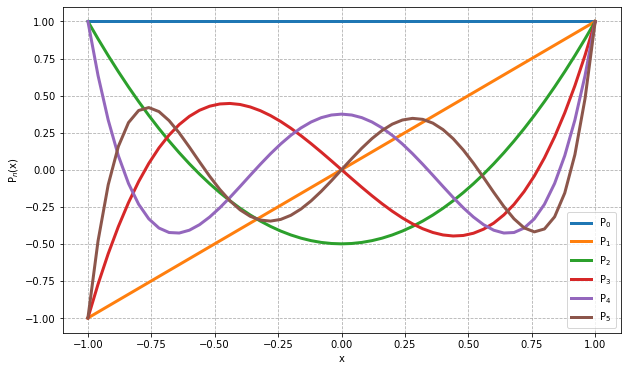

In [7]:
plt.figure(figsize=(10,6))
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.xlabel('x')
plt.ylabel('P$_{n}$(x)')
plt.grid(linestyle='--')
for n in range(nmax+1):
    plt.plot(x,Pn[n,:],linewidth=3,label='P$_{'+str(n)+'}$')
plt.legend()

----
## Associated Legendre polynomials

Next, we refer to the **associated Legendre Polynomials**, $P_n^m(x)$ with the
recursive equation:
$$
(n-m+1) P_{n+1}^{m}(x) = (2n+1) x P_{n}^{m}(x) - (n+m) P_{n-1}^{m}(x)
$$
We normalize the calculated associated Legendre polynomials:
$$
P_{nm} = \sqrt{2n+1} \frac{(n-m)!}{(n+m)!} P_n^m
$$

In [8]:
nmax = 5
mmax = nmax
x = np.linspace(-1,1,101)
Pnm = np.zeros(len(x)*(nmax+1)*(mmax+1)).reshape(nmax+1,mmax+1,len(x))
print(Pnm.shape)

for i in range(len(x)):
    tmp = lpmn(mmax,nmax,x[i])
    for n in range(nmax+1):
        for m in range(nmax+1):
            #print(n,m)
            if (m == 0):
                norm = np.sqrt(2*(2*n+1))
            elif (m > n):
                norm = 0.
            else:
                norm = np.sqrt((2*n+1)*math.factorial(n-m)/math.factorial(n+m))
            Pnm[n,m,i] = norm*tmp[0][m,n]

(6, 6, 101)


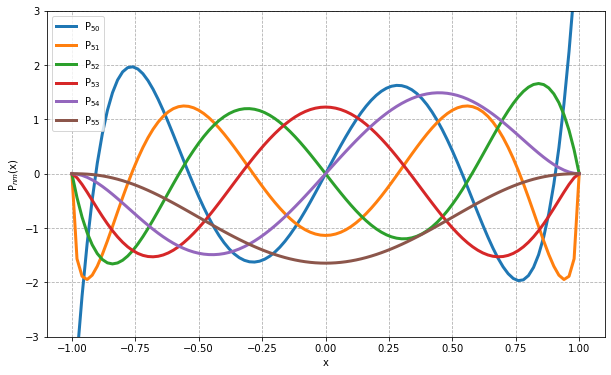

In [9]:
plt.figure(figsize=(10,6))
plt.xlim([-1.1,1.1])
plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('P$_{nm}$(x)')
plt.grid(linestyle='--')

n = nmax
for m in range(n+1):
    plt.plot(x,Pnm[n,m,:],linewidth=3,label='P$_{'+str(n)+str(m)+'}$')
plt.legend()

----
## Spherical harmonics

$$
Y_{nm}(\vartheta,\Phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}} P_n^m(\cos\vartheta) e^{im \Phi}
$$
with
- $\Theta \in [90,-90]$ latitude
- $\vartheta \in [0,180]$ co-latitude
- $\Phi \in [0,360]$ longitude

Note: $x=\cos(\vartheta)$.

Note: **Latitude** $\Theta$ and **Co-latitude** $\vartheta$ are (roughly) related through:
$$
\Theta = 90 - \vartheta
$$

In [10]:
# define coordinates
d2r   = np.pi/180.
dlong = 101 #21
dcolat = 51 #11
colat = np.linspace(0, np.pi, dcolat)
print(colat.shape)
long  = np.linspace(0, 2*np.pi, dlong)
colat, long = np.meshgrid(colat, long)
print(colat.shape)

(51,)
(101, 51)


In [12]:
n=2;m=0
Ynm = sph_harm(m, n, long, colat)
print(Ynm.shape)
print(Ynm)

(101, 51)


Text(0, 0.5, 'Latitude [$^{\\circ}$]')

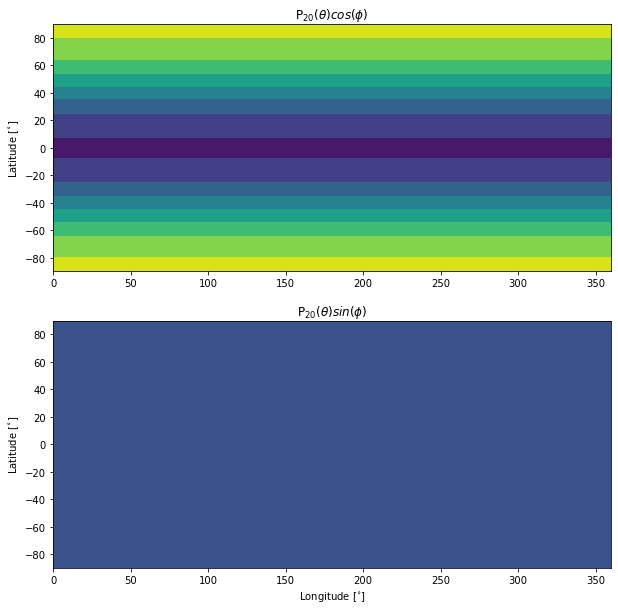

In [16]:
n=2;m=0
Ynm = sph_harm(m, n, long, colat)

fig,axs = plt.subplots(2,1,figsize=(10,10))
axs[0].set_title('P$_{'+str(n)+str(m)+'}(\\theta) cos(\\phi)$')
axs[0].set_ylabel('Latitude [$^{\circ}$]')
axs[0].contourf(long/d2r,90-colat/d2r,Ynm.real)
axs[1].set_title('P$_{'+str(n)+str(m)+'}(\\theta) sin(\\phi)$')
axs[1].contourf(long/d2r,90-colat/d2r,Ynm.imag)
axs[1].set_xlabel('Longitude [$^{\circ}$]')
axs[1].set_ylabel('Latitude [$^{\circ}$]')

Text(0, 0.5, 'Latitude [$^{\\circ}$]')

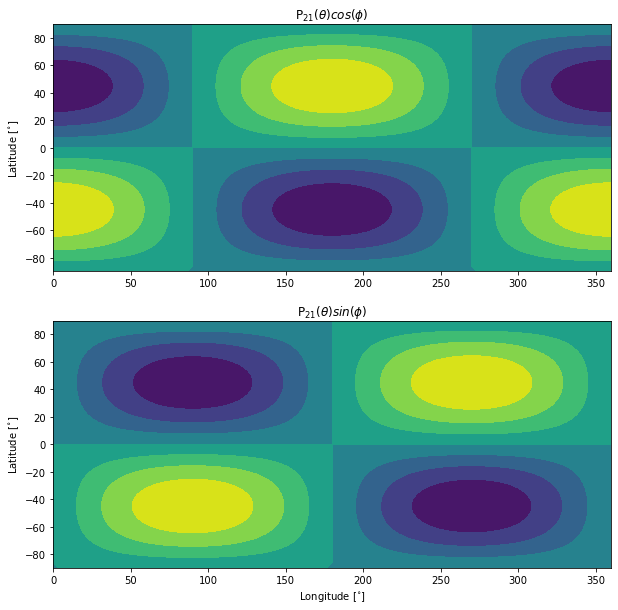

In [17]:
n=2;m=1
Ynm = sph_harm(m, n, long, colat)

fig,axs = plt.subplots(2,1,figsize=(10,10))
axs[0].set_title('P$_{'+str(n)+str(m)+'}(\\theta) cos(\\phi)$')
axs[0].set_ylabel('Latitude [$^{\circ}$]')
axs[0].contourf(long/d2r,90-colat/d2r,Ynm.real)
axs[1].set_title('P$_{'+str(n)+str(m)+'}(\\theta) sin(\\phi)$')
axs[1].contourf(long/d2r,90-colat/d2r,Ynm.imag)
axs[1].set_xlabel('Longitude [$^{\circ}$]')
axs[1].set_ylabel('Latitude [$^{\circ}$]')

Text(0, 0.5, 'Latitude [$^{\\circ}$]')

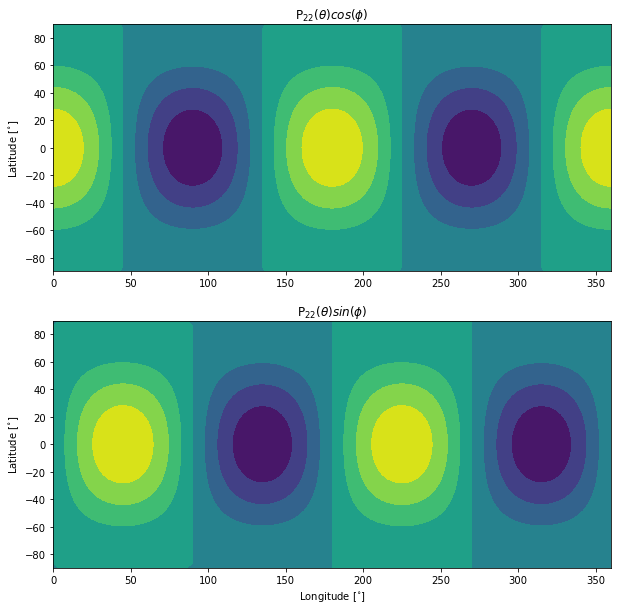

In [18]:
n=2;m=2
Ynm = sph_harm(m, n, long, colat)

fig,axs = plt.subplots(2,1,figsize=(10,10))
axs[0].set_title('P$_{'+str(n)+str(m)+'}(\\theta) cos(\\phi)$')
axs[0].set_ylabel('Latitude [$^{\circ}$]')
axs[0].contourf(long/d2r,90-colat/d2r,Ynm.real)
axs[1].set_title('P$_{'+str(n)+str(m)+'}(\\theta) sin(\\phi)$')
axs[1].contourf(long/d2r,90-colat/d2r,Ynm.imag)
axs[1].set_xlabel('Longitude [$^{\circ}$]')
axs[1].set_ylabel('Latitude [$^{\circ}$]')

... done